In [143]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
%matplotlib inline

In [144]:
# Use to grab data from the web(HTTP capabilities)
import requests

# Use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [145]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source=requests.get(url)
source=source.text

poll_data=StringIO(source)

In [146]:
poll_df=pd.read_csv(poll_data)

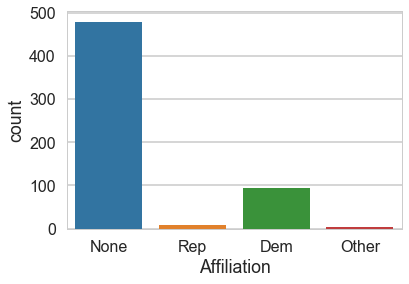

In [133]:
sns.countplot('Affiliation',data=poll_df)

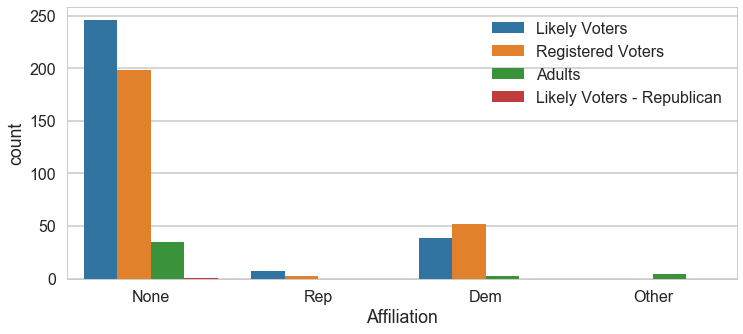

In [31]:
plt.figure(figsize=(12,5))
sns.countplot('Affiliation',data=poll_df,hue='Population')
plt.legend(loc='upper right') # move the legend to the right

In [39]:
avg=pd.DataFrame(poll_df.mean()) # will automatically apply this function for numerical variables, excluding categorical variables

#avg.drop('Number of Observations',axis=0,inplace=True)

In [40]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


In [41]:
std=pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

In [42]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN


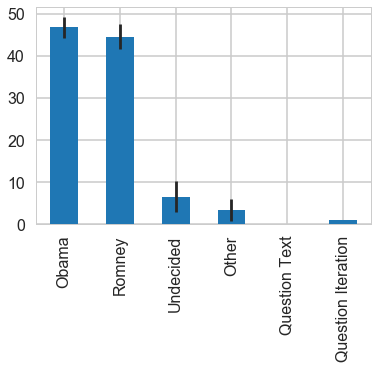

In [43]:
avg.plot(yerr=std,kind='bar',legend=False) # plot the average of a numerical variable and add the std bar

In [44]:
poll_avg=pd.concat([avg,std],axis=1)

In [45]:
poll_avg.columns=['Average','STD']

In [46]:
poll_avg.head()

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN


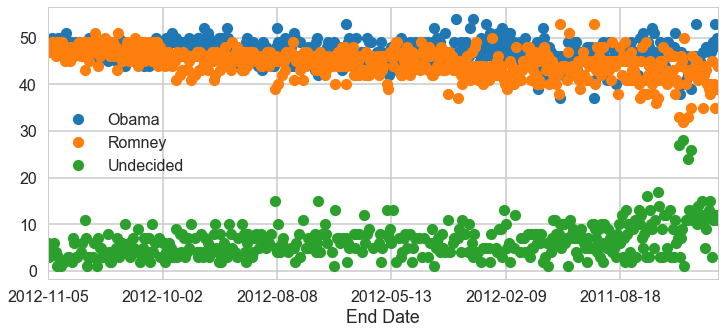

In [51]:
# Quick Time Series Plot
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o',figsize=(12,5))

In [134]:
from datetime import datetime

In [135]:
poll_df['Difference']=(poll_df.Obama-poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [136]:
poll_df = poll_df.groupby('Start Date',as_index=False).mean()
## as_index=False will not make the groupby column as the index
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


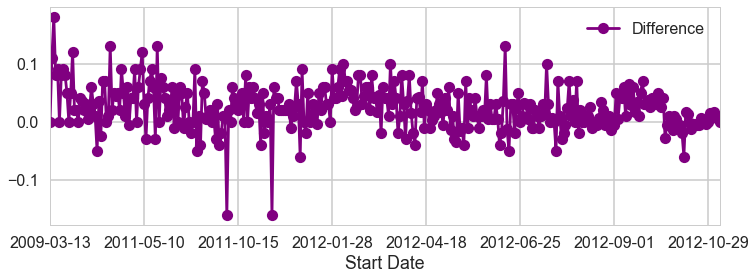

In [137]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [138]:
poll_df.set_index('Start Date',inplace=True)

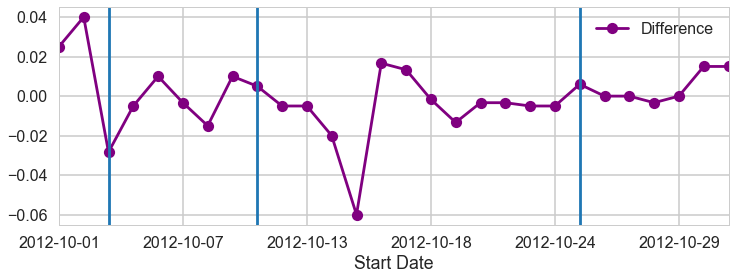

In [142]:
oct_data=poll_df[(poll_df.index>= '2012-10') & (poll_df.index<='2012-11')]
oct_data.plot(y='Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')
plt.axvline(oct_data.index.get_loc('2012-10-04'))# when the row index is not a number, espacially when it is a date, using .index.get_loc() to access the location of the index
plt.axvline(oct_data.index.get_loc('2012-10-11'))
plt.axvline(oct_data.index.get_loc('2012-10-25'))